### Imports

In [3]:
import scipy.io as sci
from scipy.signal import medfilt
from scipy import ndimage

import h5py

import numpy as np
import matplotlib.pyplot as plt

### Functions

In [35]:
def plot_connections(xpos, ypos,num_points = 25):
    plt.cla()
    plt.xlim(0,148)
    plt.ylim(148,0)
    [plt.plot([xpos[c[0]],xpos[c[1]]],[ypos[c[0]],ypos[c[1]]]) for c in connections[:num_points]];
    
def orient_img(frame):
    frame = box[i,:,:]
    rotated = ndimage.rotate(frame, 270)
    img = np.fliplr(rotated)
    return img
    
def animate(i):
    #plt.figure()
    xpos = preds[:,0,i] #this takes out the x positions of all the joints in the ith frame
    ypos = preds[:,1,i] #same, for y -- shape is (32, )
    plot_connections(xpos, ypos)
    plt.scatter(xpos, ypos, s=10)
    
    frame = box[i,:,:]
    rotated = ndimage.rotate(frame, 270)
    img = np.fliplr(rotated)
    plt.imshow(img)
    #return plot_connections(xpos, ypos), plt.scatter(xpos, ypos, s=10), plt.imshow(img)

### Reading in files 
This is the first file of 12 .h5 files. 
#### *mat* is the prediction file with the x and y positions of the 32 joints throughout time 
#### *skeleton* is the skeleton file ... we really only need it for the connections between joints
#### *f* is the file of the actual fly video

In [5]:
mat = sci.loadmat('preds01.mat')
skeleton = sci.loadmat('skeleton[current].mat')
f = h5py.File('alignedh5s/01.h5', 'r')

/home/ishi/anaconda3/lib/python3.7/site-packages/scipy/io/matlab/mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


### Joints

0 - head

1 - neck

2 - thorax

3 - abdomen

4 - foreleg L1

5 - foreleg L2

6 - foreleg L3

7 - foreleg L4

8 - midleg L1

9 - midleg L2

10- midleg L3

11- midleg L4

.

.

.

30- leftwingtip

31- rightwingtip

### Time series of joint pos, smoothed w/ median filter

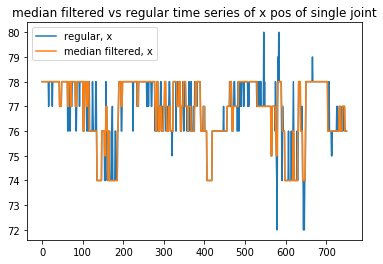

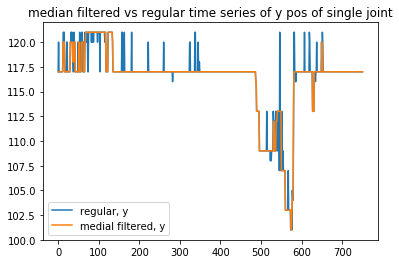

In [6]:
%matplotlib inline

preds = mat['preds'][0,0][2] # shape is a 32 x 2 x 751 --> joints x dimensions x #_frames

joint = 0 # joint from 0 to 31, represents one of the specified points. In this case, 0 is the head pos.

t = np.linspace(0, 750, 751) # creating a time point for every frame --> [0, 1, 2, ... , 749, 750]

x = preds[joint,0,:] # this takes out the x positions of a single joint over time --> time series of single joint
y = preds[joint,1,:] # same w/ y --> time series of joint pos... shape is (751, ) 

xpos = preds[:, 0, 0] # this takes out the x positions of all the joints in the first frame 
ypos = preds[:, 1, 0] # this takes out the y positions ... shape is (32, )

filter_window = 5

mf_x = medfilt(x, kernel_size=filter_window) #applying the median filter to the joint time series.
mf_y = medfilt(y, kernel_size=filter_window) #shape is still (751, ) but each val is median of sliding window 

plt.plot(t, x, label='regular, x')
#plt.plot(t[::filter_window], x[::filter_window], label='every nth, x')
plt.plot(t, mf_x, label='median filtered, x')

#plt.plot(t, y, label='regular, y')
#plt.plot(t[::filter_window], y[::filter_window], label='every nth, y')
#plt.plot(t, mf_y, label='median filtered, y')
plt.title('median filtered vs regular time series of x pos of single joint')
plt.legend()

plt.figure()
plt.plot(t, y, label='regular, y')
plt.plot(t, mf_y, label='medial filtered, y')
plt.title('median filtered vs regular time series of y pos of single joint')
plt.legend()

#to visualize fly 

#plt.figure()
#plt.scatter(xpos, ypos) ## this is a completely different figure, not a time series but a scatter plot of all 
# the joint pos for a given frame

### Plotting the skeleton

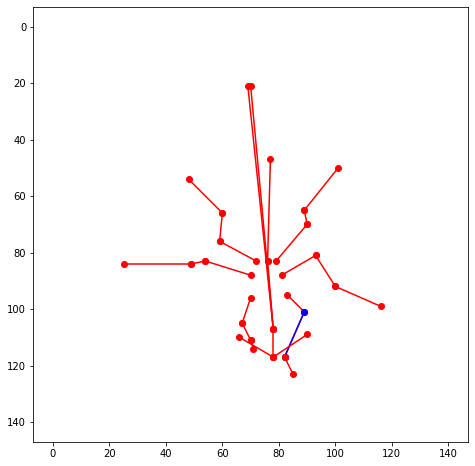

In [7]:
%matplotlib inline
connections = skeleton['edges'] - 1 # matlab numbers from 1, so subtract one
#connections.shape is 25 x 2, it gives the connections between all the joints
fig = plt.figure(figsize=(8,8))
plt.xlim(0,140)
plt.ylim(140,0) #switch the bounds so that the fly is facing downwards as in the movie
plt.axis('scaled')
#plots the connections between joints
for c in connections:
    start_indx = c[0] 
    end_indx = c[1] 
    plt.plot([xpos[start_indx], xpos[end_indx]], [ypos[start_indx], ypos[end_indx]], 'ro-')
    
#this is the vectorized, single-line pythonic version
#[plt.plot([xpos[c[0]],xpos[c[1]]],[ypos[c[0]],ypos[c[1]]]) for c in connections];

    
# can use this to visualize a single joint --> figure out joint = # corresponds 
# to what joint. --> the connections to the joint will light up 
    if c[0] == 5: 
        plt.plot([xpos[start_indx], xpos[end_indx]], [ypos[start_indx], ypos[end_indx]], 'bo-')

In [8]:
#This is the video of the fly. Shape of f['box'] is 751 x 1 x 148 x 148 where 148 is the img size,
#751 is the number of frames and 1 is the channel... since its grayscale i just take that out
box = f['box'][:,0,:,:] #This is the full video of the fly. the shape is 751 x 148 x 148

first_frame = box[0,:,:] #extracting out the first frame, shape is 148x148. Fly facing to the right

#rotate the image counter-clockwise and flip it across the vertical axis the get it aligned w/ the skeleton 
rotated = ndimage.rotate(first_frame, 270)
img = np.fliplr(rotated)
#plt.imshow(first_frame)
#plt.imshow(rotated)
#plt.imshow(img)

### Plotting the prediction frame over the image

<IPython.core.display.Javascript object>


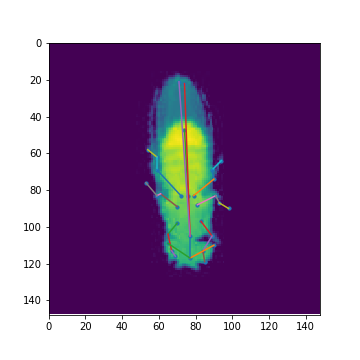

In [34]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.scatter(xpos, ypos, s=20)

#vectorized
[plt.plot([xpos[c[0]],xpos[c[1]]],[ypos[c[0]],ypos[c[1]]]) for c in connections];

def plot_connections(xpos, ypos):
    plt.cla()
    plt.xlim(0,148)
    plt.ylim(148,0)
    [plt.plot([xpos[c[0]],xpos[c[1]]],[ypos[c[0]],ypos[c[1]]]) for c in connections];

### Animation
Of the fly video with the prediction skeleton overlayed

<IPython.core.display.Javascript object>


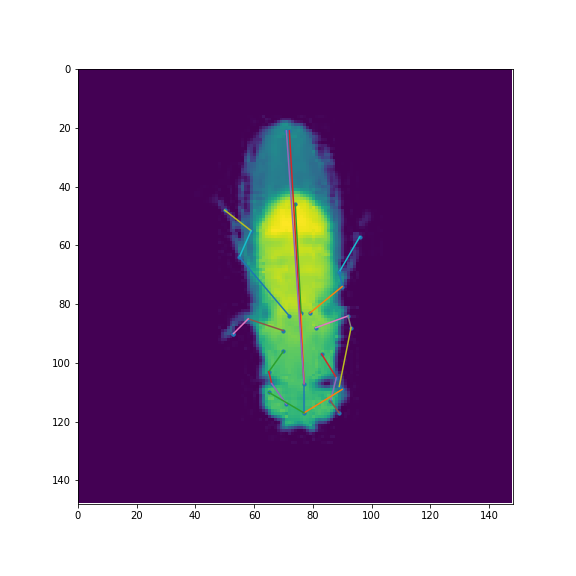

In [36]:
''' 
This is weird. Idk why, but in order to see the animation you need to run the block with plt.figure() and 
then remove it and it will work... not sure why that is. Apparently the error is lacking a 'canvas' to 
paint the figure over
'''

#Uncomment below line to see animation
%matplotlib notebook

import matplotlib.animation as animation
fig = plt.figure(figsize=(8,8))
plt.xlim(0,148)
plt.ylim(148,0)
def animate(i):
    #plt.figure()
    xpos = preds[:,0,i] #this takes out the x positions of all the joints in the ith frame
    ypos = preds[:,1,i] #same, for y -- shape is (32, )
    plot_connections(xpos, ypos)
    plt.scatter(xpos, ypos, s=10)
    #plt.annotate('hi', xpos[5], ypos[5])
    frame = box[i,:,:]
    rotated = ndimage.rotate(frame, 270)
    img = np.fliplr(rotated)
    plt.imshow(img)
    #return plot_connections(xpos, ypos), plt.scatter(xpos, ypos, s=10), plt.imshow(img)
    
ani = animation.FuncAnimation(fig, animate, frames=150, repeat = True)
#plt.axis('scaled')#plt.gca().set_aspect('equal', adjustable='box')
plt.show()
#plt.colorbar(plt.imshow(img)) # you can pass in the colored img of the fly as an argument to get the cbar

### Now, with a median filter

*mf_pos* is a dictionary where keys are 0-31, representing joints and the values are a list of x, y pos

--> mf_pos[joint] = [x, y] where x and y are np arrays of size (751, )

In [13]:
mf_pos = dict()
filter_window = 5

for joint in range(32):
    x = preds[joint, 0, :]
    y = preds[joint, 1, :]
    
    mf_pos[joint] = [medfilt(x, kernel_size=filter_window),
                     medfilt(y, kernel_size=filter_window)]

In [14]:
#Maybe a bad idea. but I tried plotting mf over vid of fly. didn't work too well (did i mess up?)
#fig = plt.figure(figsize=(8,8))
#plt.xlim(0,148)
#plt.ylim(148,0)

def animate(i):
    mf_xpos = [mf_pos[joint][0][i] for joint in range(32)];
    mf_ypos = [mf_pos[joint][1][i] for joint in range(32)];
    plot_connections(mf_xpos, mf_ypos)
    plt.scatter(mf_xpos, mf_ypos, s=10)

    frame = box[i, :, :]
    rotated = ndimage.rotate(frame, 270)
    img = np.fliplr(rotated)
    plt.imshow(img)
    
#ani = animation.FuncAnimation(fig, animate, frames=50, repeat = True)

In [15]:
mf_xpos = np.array([mf_pos[joint][0] for joint in range(32)])
mf_ypos = np.array([mf_pos[joint][1] for joint in range(32)])

<IPython.core.display.Javascript object>


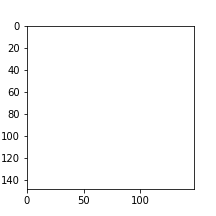

In [25]:
%matplotlib notebook

Lforeleg_x = mf_xpos[4:8,:]
Lforeleg_y = mf_ypos[4:8,:]

fig = plt.figure(figsize=(3,3))
plt.xlim(0,148)
plt.ylim(148,0)
def leg_animate(i):
    #fig = plt.figure()
    Lforeleg_x = preds[4:8,0,i]
    Lforeleg_y = preds[4:8,1,i]
    plot_connections(Lforeleg_x, Lforeleg_y, num_points=3)
    plt.scatter(Lforeleg_x, Lforeleg_y, s=10)

    frame = box[i, :, :]
    rotated = ndimage.rotate(frame, 270)
    img = np.fliplr(rotated)
    plt.imshow(img)
    plt.show()
ani = animation.FuncAnimation(fig, leg_animate, frames=50, repeat = True) 

In [38]:
lx1, ly1 = mf_xpos[4,:], mf_ypos[4,:]
lx2, ly2 = mf_xpos[5,:], mf_ypos[5,:]
lx3, ly3 = mf_xpos[6,:], mf_ypos[6,:]
lx4, ly4 = mf_xpos[7,:], mf_ypos[7,:]

lx12 = lx2-lx1
ly12 = ly2-ly1
l12 = np.sqrt(lx12**2 + ly12**2)

lx23 = lx3 - lx2
ly23 = ly3 - ly2
l23 = np.sqrt(lx23**2 + ly23**2)


In [39]:
cos_angs = ((lx12*lx23)+(ly12*ly23)) / (l12*l23)
angs = np.arccos(cos_angs)

/home/ishi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


In [40]:
np.degrees(angs)

array([9.33664607e+01, 9.43987054e+01, 8.62686030e+01, 4.22736890e+01,
       4.22736890e+01, 3.09637565e+01, 3.03432489e+01, 3.36900675e+01,
       5.85704344e+01, 5.85704344e+01, 5.85704344e+01, 5.85704344e+01,
       5.85704344e+01, 5.85704344e+01, 5.85704344e+01, 4.60416267e+01,
       4.60416267e+01, 3.09637565e+01, 4.50000000e+01, 5.65237217e+01,
       5.65237217e+01, 6.34349488e+01, 7.30091767e+01, 7.15650512e+01,
       6.02551187e+01, 5.15198018e+01, 4.06012946e+01, 5.15198018e+01,
       6.15570714e+01, 6.15570714e+01, 6.78336542e+01, 7.86900675e+01,
       8.68201699e+01, 7.89297974e+01, 7.89297974e+01, 7.89297974e+01,
       5.54914770e+01, 5.54914770e+01, 4.22736890e+01, 8.30887729e+01,
       9.00000000e+01, 7.39600567e+01, 6.63706223e+01, 6.94439548e+01,
       6.88752809e+01, 3.80887729e+01, 4.90282637e+01, 6.78336542e+01,
       7.28972710e+01, 7.28972710e+01, 7.86900675e+01, 7.86900675e+01,
       7.86900675e+01, 5.63099325e+01, 4.50000000e+01, 4.50000000e+01,
      

In [32]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Ishi'), bitrate=1800)
ani.save('skeleton_overlay150frames.mp4', writer=writer)